In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
from tensorflow.keras import layers, callbacks
from tensorflow import keras
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.style.use('ggplot')

In [2]:
df = pd.read_csv('80-cereals/newdf.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Manufacturer,Type,Calories,Protein,Fat(g),Sodium,Fiber,Carbo,Sugars,Pottasium(mg),Vitamins,Shelf,Weight,Cups,Rating
0,0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,4,Almond Delight,Ralston Purina,Cold,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


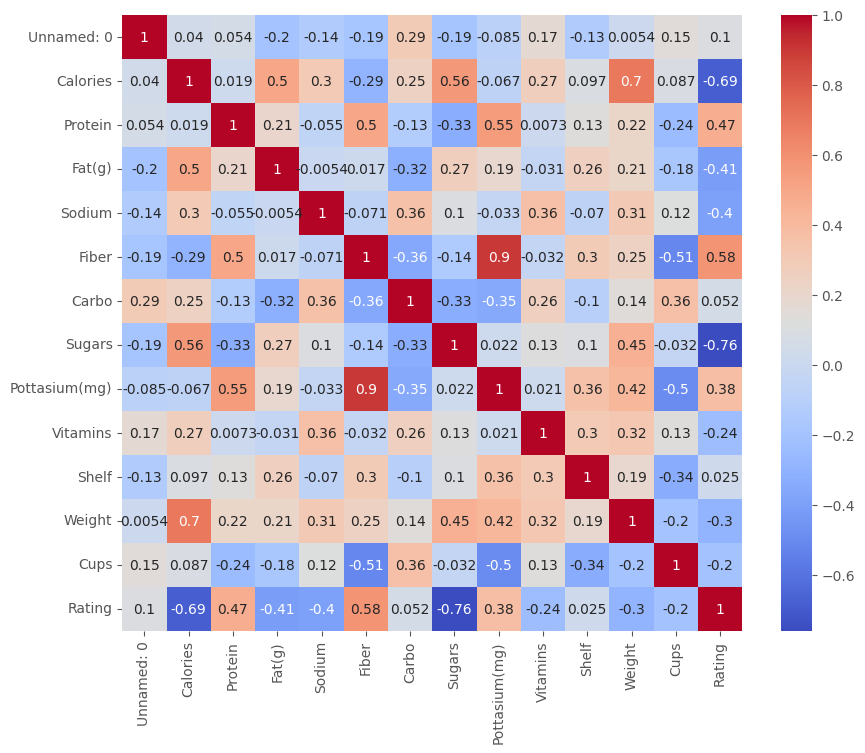

In [4]:
df_plot = df.drop(['Name', 'Manufacturer', 'Type'], axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(df_plot.corr(), cmap='coolwarm', annot=True)
plt.show()

In [5]:
data = df[['Fat(g)','Sodium', 'Fiber', 'Weight', 'Sugars', 'Vitamins', 'Calories']]

In [6]:
data.shape

(77, 7)

In [7]:
## to create training and validation data set using pandas 
df_train = data.sample(frac=0.7, random_state=2)
df_valid = data.drop(df_train.index)
display(df_train.head())

,Fat(g),Sodium,Fiber,Weight,Sugars,Vitamins,Calories
29,1,135,0.0,1.00,12,25,110
27,2,160,5.0,1.25,10,25,120
54,0,0,0.0,0.50,0,0,50
50,0,170,3.0,1.00,2,25,90
71,1,200,3.0,1.00,3,100,100


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_valid_scaled = scaler.transform(df_valid)


In [9]:
# spliting into features and target set
X_train = df_train.drop('Calories', axis=1)
X_test = df_valid.drop('Calories', axis=1)
y_train = df_train['Calories']
y_test = df_valid['Calories']

In [10]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, 
    patience = 20, 
    restore_best_weights =True
)

model = keras.Sequential(
[
  layers.Dense(1024, input_shape=[6], activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(1024, activation='relu'),
  layers.Dense(1024, activation='relu'),
  layers.Dense(1024, activation='relu'),
  layers.Dense(1)
]
)

c:\Users\USER PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='mae')

In [12]:
X_train.shape

(54, 6)

In [13]:
history = model.fit(
    X_train, y_train, 
    epochs=200,
    validation_data=(X_test, y_test), 
    batch_size=27,
    callbacks = [early_stopping], 
    verbose=False
)

<Axes: >

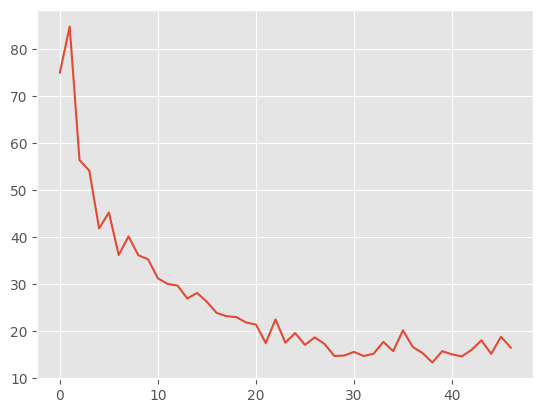

In [14]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

Minimum validation loss: 14.378802299499512


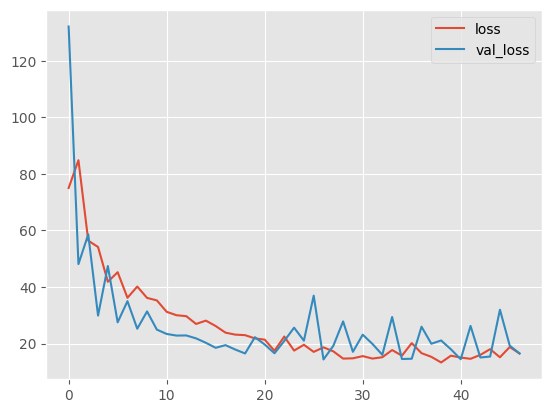

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [16]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 480.12876588080593
Mean Absolute Error: 14.378802423891814
R^2 Score: -0.42850446701049805
